In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer

In [2]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


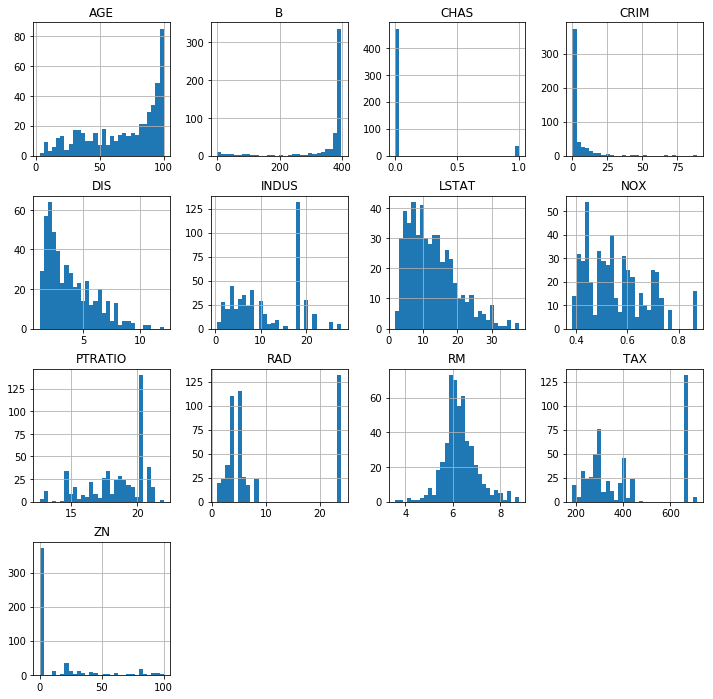

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# (not in this recipe in book)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

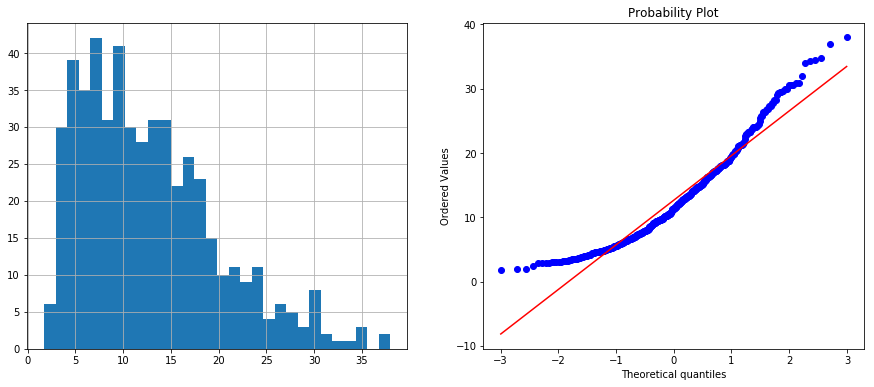

In [5]:
# check original distribution (not in book recipe)

diagnostic_plots(data, 'LSTAT')

## Square / Cube root transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply the square root transformation to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.sqrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

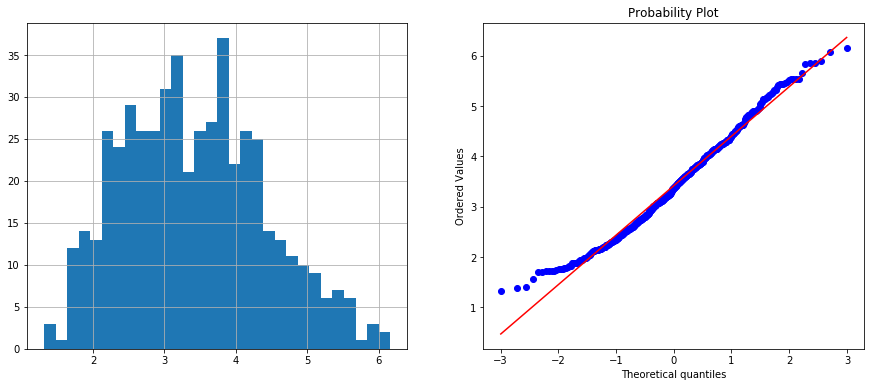

In [8]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'LSTAT')

In [9]:
# apply the cube root transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.cbrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

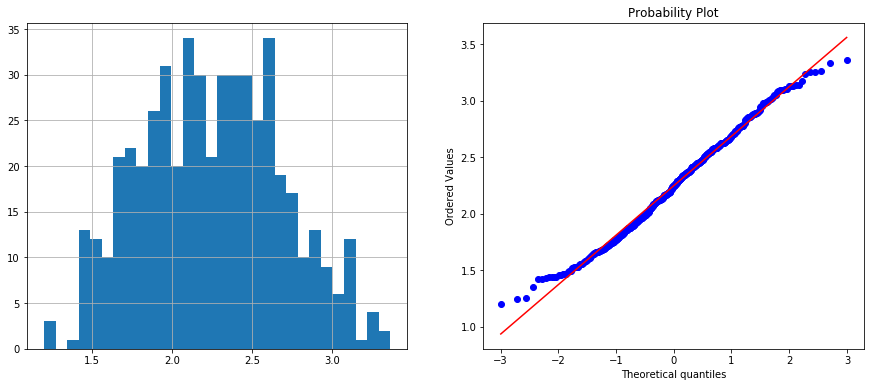

In [10]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'LSTAT')

## Square / Cube root transformation with Scikit-learn

In [11]:
# start the transformer with NumPy sqrt as argument

transformer = FunctionTransformer(np.sqrt, validate=True)

In [12]:
# make a list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

In [13]:
# capture NumPy array into dataframe (not in book) 
data_tf = pd.DataFrame(data_tf, columns=cols)

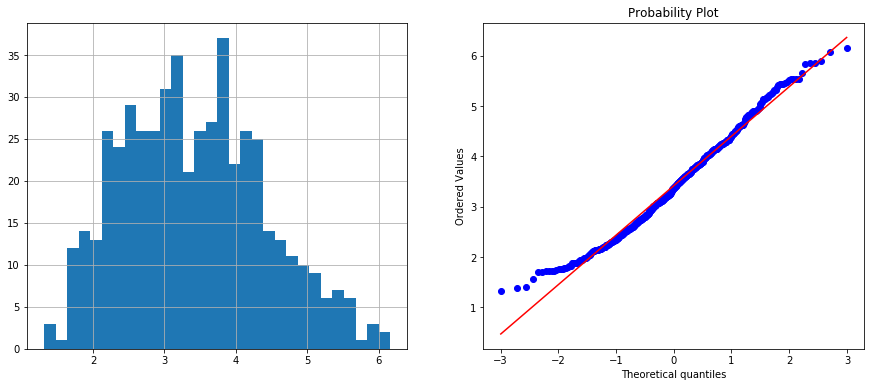

In [14]:
#make plot to visualize transformation (not included in book)
diagnostic_plots(data_tf, 'LSTAT')

## There is more...

### Only summarized in book, code not present

Apply Square and cube root with Feature-engine

In [15]:
from feature_engine.variable_transformers import PowerTransformer

In [16]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data)

PowerTransformer(exp=0.3333333333333333,
                 variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [17]:
# transform indicated variables within our dataframe
data_tf = et.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


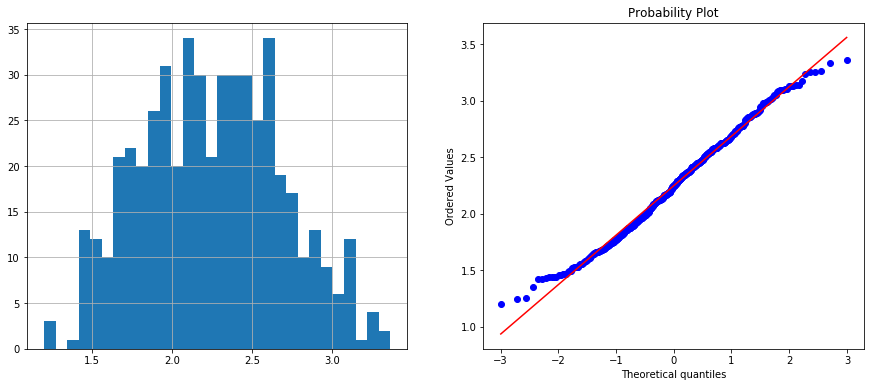

In [18]:
# visualize the trasnformation

diagnostic_plots(data_tf, 'LSTAT')